# Introduction

## Project Description
The primary objective of this project is to apply key **Machine Learning** concepts, such as data cleaning, feature engineering, model selection, hyperparameter tuning, and performance evaluation. By exploring various  models and evaluation metrics, we expect to gain a deeper understanding of how to build and optimize predictive models.

The aim is to perform a classification task using the well-known **Adult Income Dataset**. The target variable is whether a person earns more or less than 50K USD per year.

## Dataset Description
The [Adult Income Dataset](https://archive.ics.uci.edu/dataset/2/adult) was originally extracted from the 1994 US Census Database and is commonly used for binary classification tasks in ML. It contains demographic and economic features that may influence a person’s income level.

It consists of 6 numerical features and 9 categorical features, including:
* Demographic Information: `age`, `sex`, `race`, `marital-status`, `native-country`, `relationship`.
* Education & Occupation: `education`, `education-num`, `workclass`, `occupation`.
* Financial Attributes: `capital-gain`, `capital-loss`, `hours-per-week`, `fnlwgt`.
* The Target Variable: `class` (<=50K or >50K)

## Project Overview
1. **Getting Started**: import libs and access the data.
2. **Exploratory Data Analysis**: Explore the dataset, visualize feature distributions, identify correlations.
3. **Data Preprocessing**: Handle missing values, handle text, scale data, split between train and test set.
4. **Model Training**: Train different classification models and perform hyperparameter tuning.
5. **Model Evaluation**: Evaluate model performance using various metrics.

# Getting Started

## Import necessary packages
You can download all of the necessary packages using: `pip install pandas numpy seaborn matplotlib scikit-learn`

In [47]:
# File manipulation tools
import os
import pandas as pd
import tarfile
import urllib.request

# Data visualization tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Predictors
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Performance metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV, cross_validate, validation_curve
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


## Data Access
The dataset is hosted on our GitHub repository. There is also a description from the original authors in `adult.names`.

In [48]:
DOWNLOAD_URL = "https://github.com/fatimaezzahra-creator/Projet-ML/raw/refs/heads/main/datasets/adult.tgz"
DATASET_PATH = "datasets"

def fetch_data(data_url, data_path):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    tgz_path = os.path.join(data_path, "adult.tgz")
    urllib.request.urlretrieve(data_url, tgz_path)
    tgz_file = tarfile.open(tgz_path)
    tgz_file.extractall(path=data_path)
    tgz_file.close()    

def load_data():
    csv_path = os.path.join(DATASET_PATH, "adult.data")
    return pd.read_csv(csv_path, skipinitialspace=True)

fetch_data(DOWNLOAD_URL, DATASET_PATH)
data = load_data()

# Dataset Exploratory Analysis

## Analysis of Form and Content

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<Axes: >

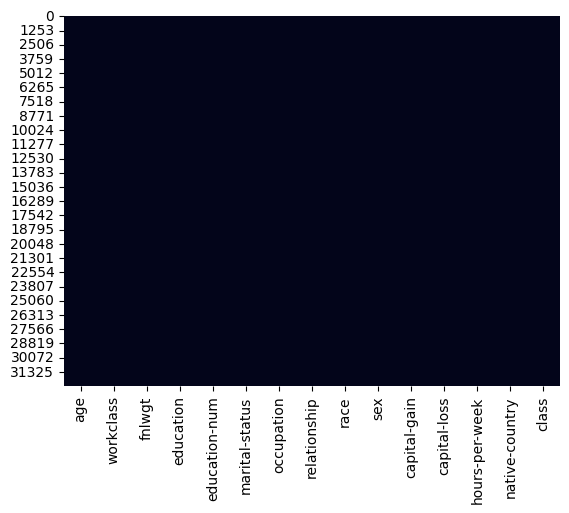

In [50]:
# Visualize Missing Data
sns.heatmap(data.isna(), cbar=False)

We can see that the graph is all dark, which means there is no missing values in the data .

In [51]:
# Distribution of the Target class
target_name = "class"
data[target_name].value_counts(normalize=True)

class
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

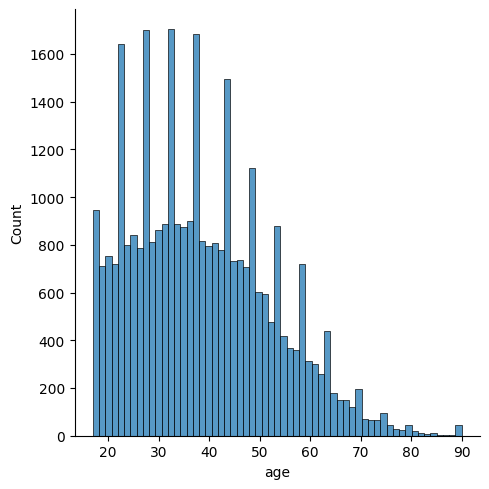

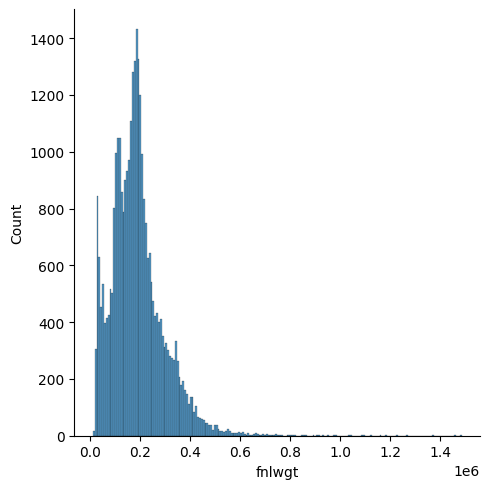

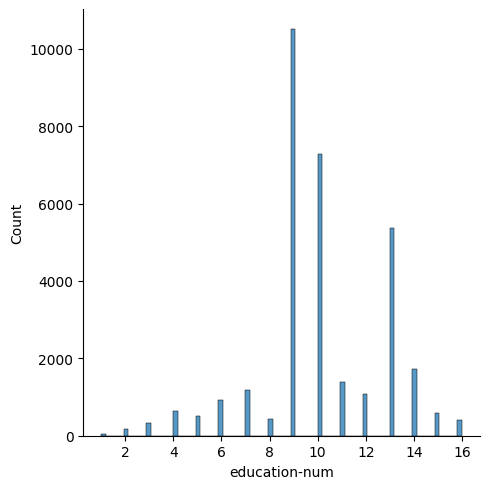

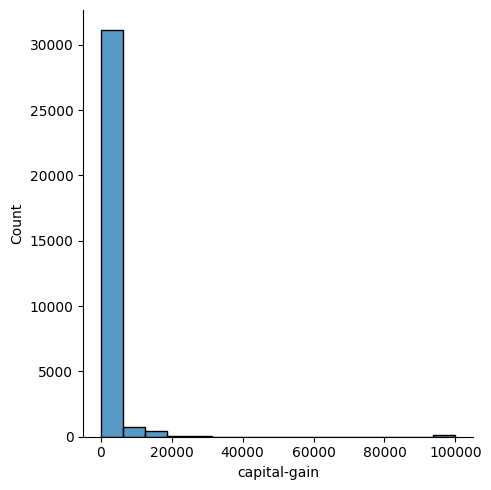

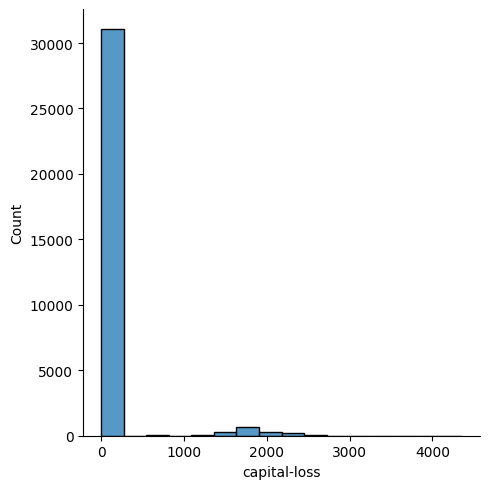

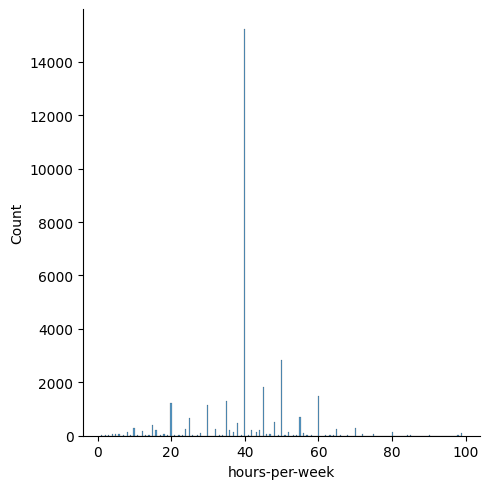

In [52]:
# Distribution of Numerical Features
for col in data.select_dtypes("int64"):
    sns.displot(data[col])

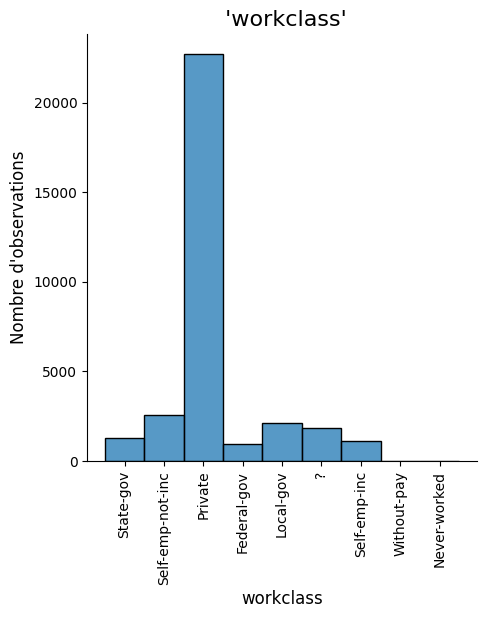

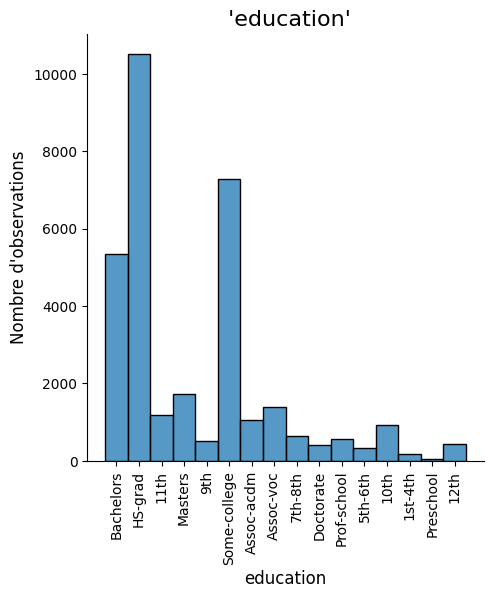

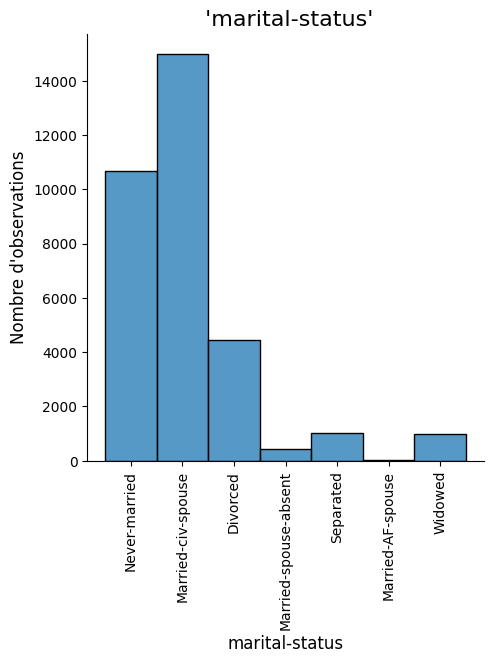

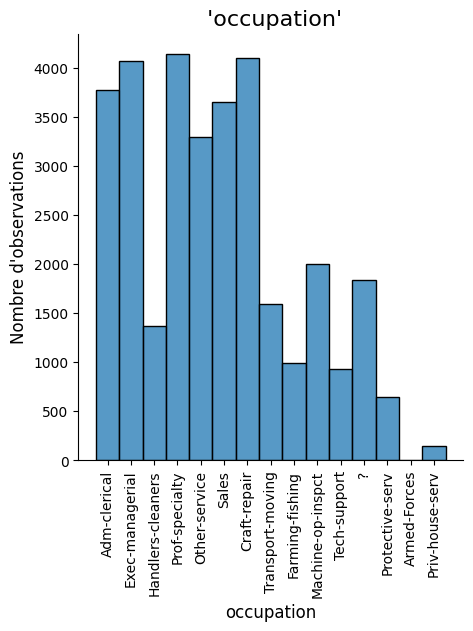

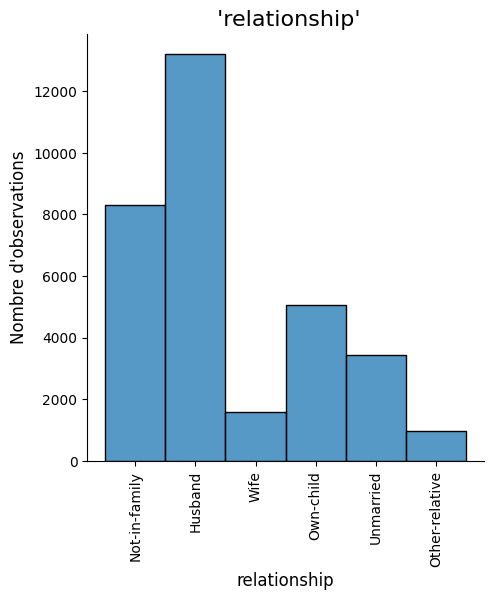

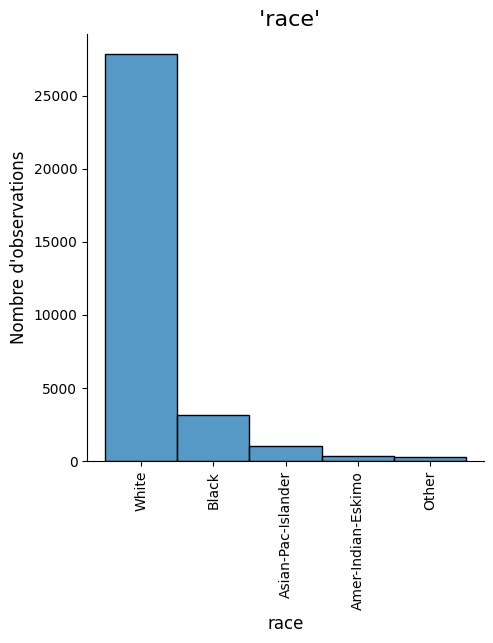

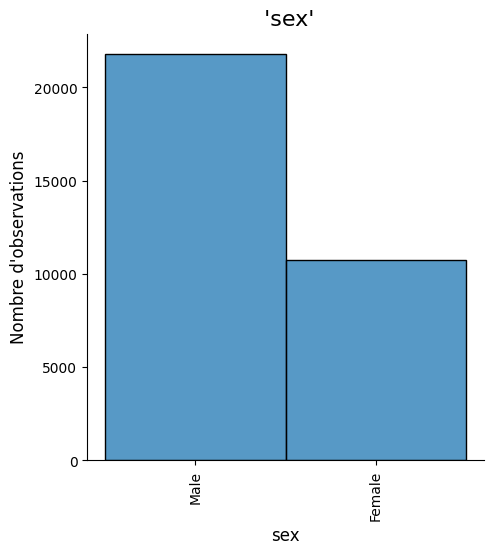

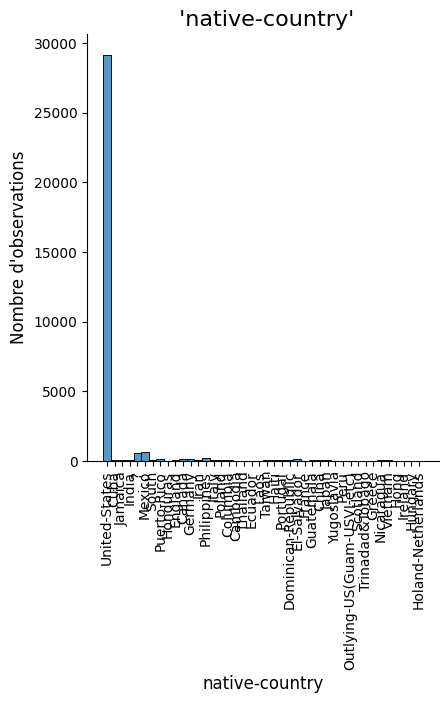

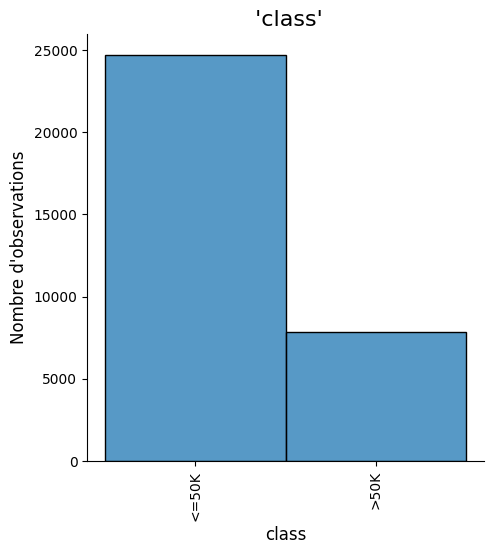

In [53]:
# Distribution of Categorical Attributes
for col in data.select_dtypes("object"):
    sns.displot(data=data, x=col)
    plt.title(f" '{col}'", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Nombre d'observations", fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

## Identifying correlations

In [54]:
# Create a copy of the data
df = data.copy()

# Creating subsets based on the target variable
class_0 = df[df[target_name] == "<=50K"]
class_1 = df[df[target_name] == ">50K"]
combined_df = (pd.concat([class_0, class_1]))

def visualize_correlation(dataframe, feature_name, target_name, rotate=False):
    sns.histplot(
        data=dataframe,
        x=feature_name,
        hue=target_name,
        stat="density",
        common_norm=False,
        palette="muted")
    if rotate:
        plt.xticks(rotation=90)
        plt.show()

def visualize_correspondance(dataframe, feature1_name, feature2_name):
    # FIX ME: add comment explaining what does the line below do
    mapping = dataframe.groupby(feature1_name)[feature2_name].unique()
    # Show mapping to verify correspondance
    for feature1, feature2 in mapping.items():
        print(f"{feature1_name}: {feature1}, {feature2_name}: {feature2}")

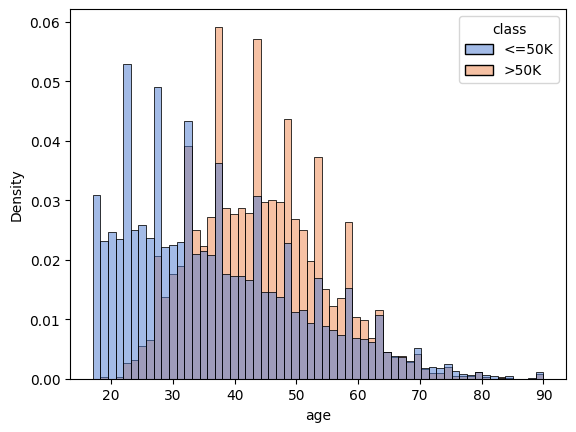

In [55]:
# Correlation between target and the 'age' feature
visualize_correlation(combined_df, "age", target_name)

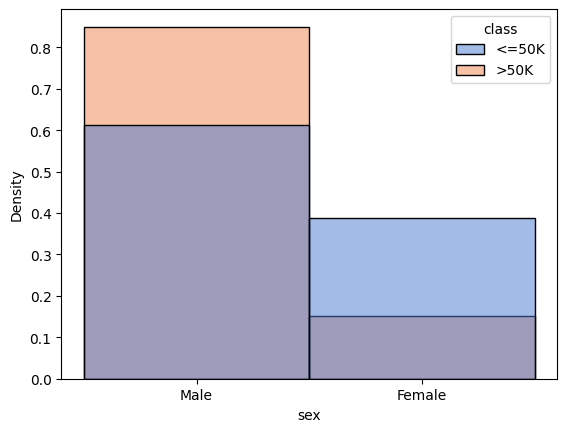

In [56]:
# Correlation between target and the 'sex' feature
visualize_correlation(combined_df, "sex", target_name)

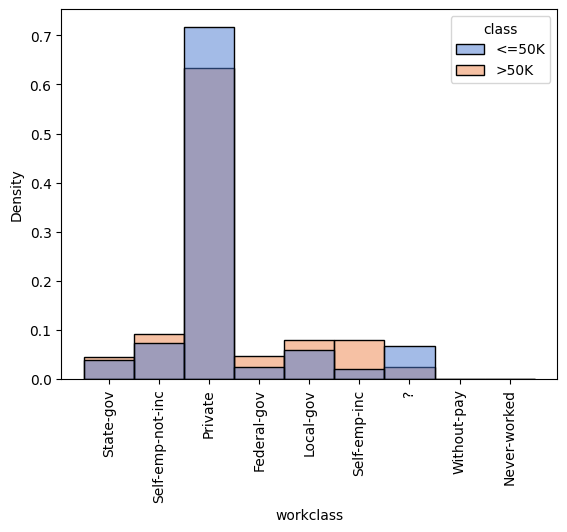

In [57]:
# Correlation between target and the 'workclass' feature
visualize_correlation(combined_df, "workclass", target_name, rotate=True)

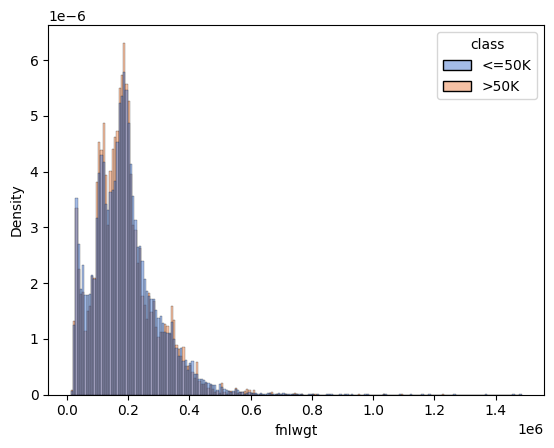

In [58]:
# Correlation between target and the 'fnlwgt' feature
visualize_correlation(combined_df, "fnlwgt", target_name)

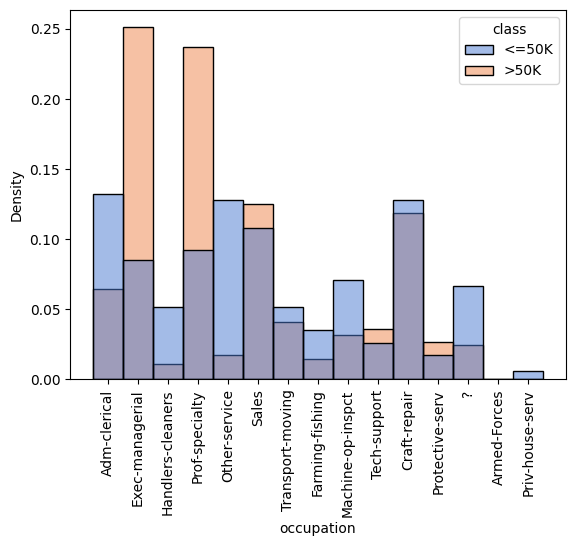

In [59]:
# Correlation between target and the 'occupation' feature
visualize_correlation(combined_df, "occupation", target_name, rotate=True)

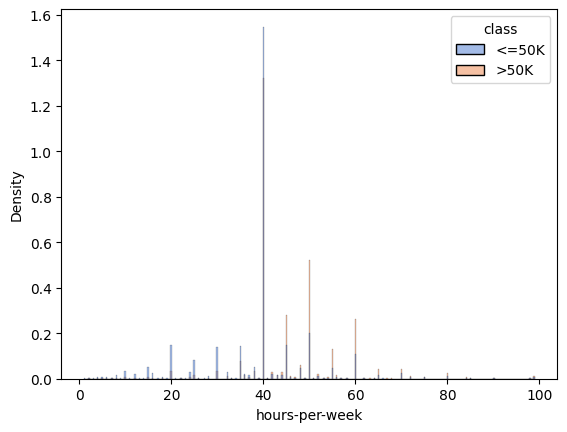

In [60]:
# Correlation between target and the 'hours-per-week' feature
visualize_correlation(combined_df, "hours-per-week", target_name)

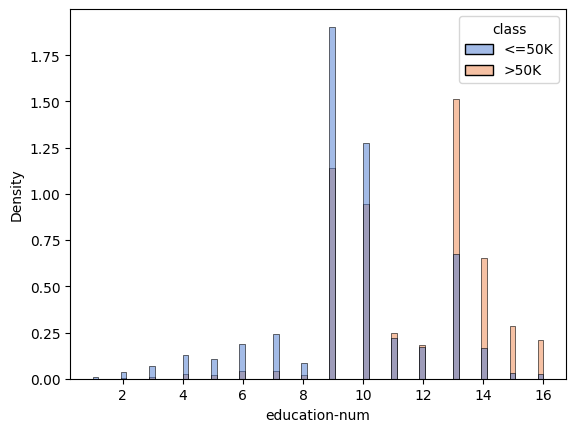

In [61]:
# Correlation between target and the 'education-num' feature
visualize_correlation(combined_df, "education-num", target_name)

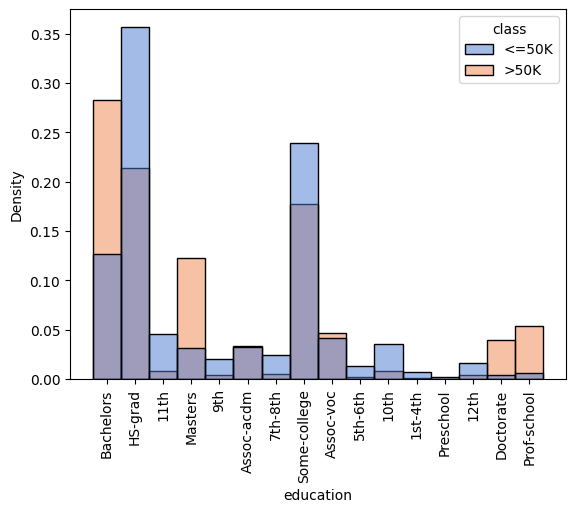

In [62]:
# Correlation between target and the 'education' feature
visualize_correlation(combined_df, "education", target_name, rotate=True)

The features `education` (categorical) and `education-num` (numerical) may convey similar information, as they both represent the education level of an individual.

In [63]:
# Correspondance between 'education' and 'education-num'
visualize_correspondance(data, "education", "education-num")

education: 10th, education-num: [6]
education: 11th, education-num: [7]
education: 12th, education-num: [8]
education: 1st-4th, education-num: [2]
education: 5th-6th, education-num: [3]
education: 7th-8th, education-num: [4]
education: 9th, education-num: [5]
education: Assoc-acdm, education-num: [12]
education: Assoc-voc, education-num: [11]
education: Bachelors, education-num: [13]
education: Doctorate, education-num: [16]
education: HS-grad, education-num: [9]
education: Masters, education-num: [14]
education: Preschool, education-num: [1]
education: Prof-school, education-num: [15]
education: Some-college, education-num: [10]


The output of this mapping shows that each education category corresponds to a single unique value of education-num in an ordinal way. That is, 1 is equivalent to the lowest level of education (Preschool), while 16 is the highest (Doctorate). This confirms that the two features are effectively encoding the same information.

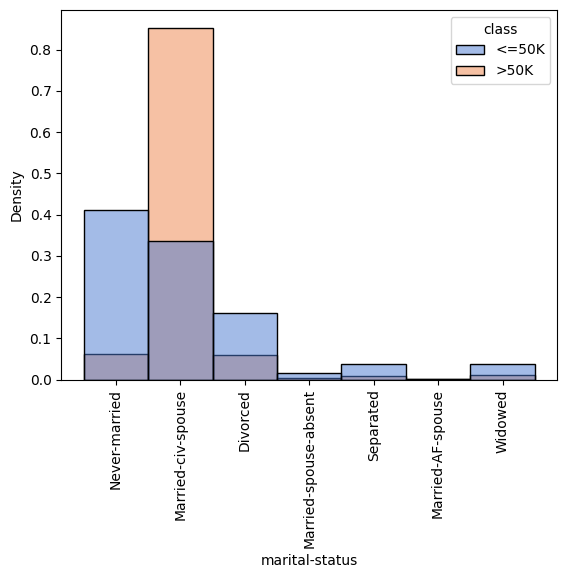

In [64]:
# Correlation between target and the 'marital-status' feature
visualize_correlation(combined_df, "marital-status", target_name, rotate=True)

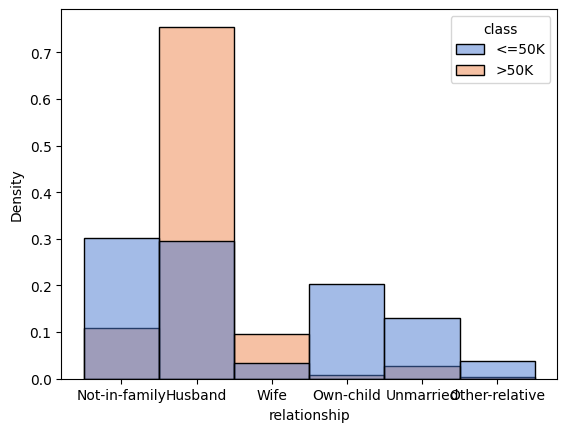

In [65]:
# Correlation between target and the 'relationship' feature
visualize_correlation(combined_df, "relationship", target_name)

The features `relationship` and `marital-status` might also convey similar information because a person's relationship type often depends on their marital status.



In [66]:
# Correspondance between 'marital-status' and 'relationship'
visualize_correspondance(data, "marital-status", "relationship")

marital-status: Divorced, relationship: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative']
marital-status: Married-AF-spouse, relationship: ['Wife' 'Husband' 'Own-child' 'Other-relative']
marital-status: Married-civ-spouse, relationship: ['Husband' 'Wife' 'Own-child' 'Other-relative' 'Not-in-family']
marital-status: Married-spouse-absent, relationship: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative']
marital-status: Never-married, relationship: ['Not-in-family' 'Own-child' 'Unmarried' 'Other-relative']
marital-status: Separated, relationship: ['Unmarried' 'Own-child' 'Other-relative' 'Not-in-family']
marital-status: Widowed, relationship: ['Unmarried' 'Not-in-family' 'Own-child' 'Other-relative']


The output reveals that for each value of marital-status, there are multiple possible values for relationship.
This variability indicates that a person's relationship cannot be uniquely determined based on their marital-status.

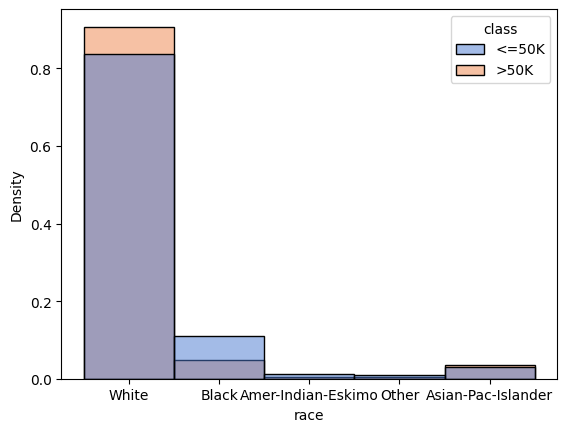

In [67]:
# Correlation between target and the 'race' feature
visualize_correlation(combined_df, "race", target_name)

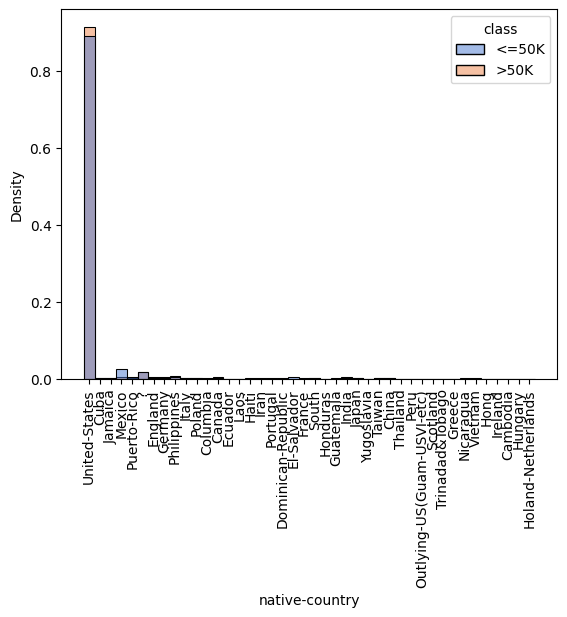

In [68]:
# Correlation between target and the 'native-country' feature
visualize_correlation(combined_df, "native-country", target_name, rotate=True)

The native-country  and race columns in the dataset contains many unique values, some of which have very low frequencies. Keeping all these rare categories can negatively impact the machine learning model due to:

Overfitting: The model may place undue importance on rare categories, learning patterns that don't generalize well to new data.
Increased Complexity: High cardinality increases the dimensionality during encoding (e.g., in one-hot encoding), which can slow down training and complicate the model unnecessarily.


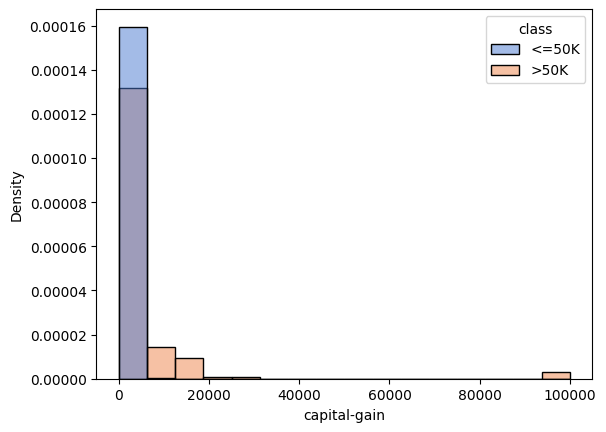

In [69]:
# Correlation between target and the 'capital-gain' feature
visualize_correlation(combined_df, "capital-gain", target_name)

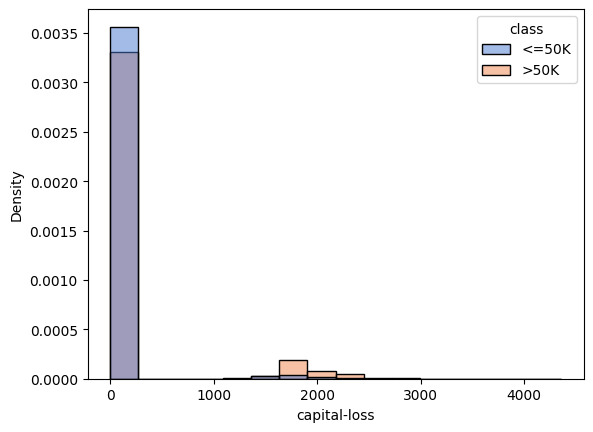

In [70]:
# Correlation between target and the 'capital-loss' feature
visualize_correlation(combined_df, "capital-loss", target_name)

The combination of capital-gain and capital-loss into a single derived feature could have a stronger correlation with the target variable (class) than either capital-gain or capital-loss individually, potentially improving the predictive power of the model.

In [71]:
# Capital Features Combination
dff = df.copy()
dff["capital-net"] = (dff["capital-gain"] - dff["capital-loss"])
dff["ratio"] = (dff["capital-gain"]/(dff["capital-loss"]+0.00000001))
dff["capital-weighted"] = (dff["capital-gain"]*0.223329 + dff["capital-loss"]*0.150526)

# Encodage LabelEncoder pour chaque colonne catégorique
label_encoders = {}
for column in dff.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    dff[column] = encoder.fit_transform(dff[column])
    label_encoders[column] = encoder  # Stocker l'encodeur pour chaque colonne (optionnel, utile pour l'inverse_transform)

# Calcul de la matrice de corrélation
corr_matrix = dff.corr()
corr_matrix[target_name].sort_values(ascending=False)

class               1.000000
education-num       0.335154
age                 0.234037
hours-per-week      0.229689
capital-weighted    0.228976
ratio               0.223329
capital-gain        0.223329
sex                 0.215980
capital-net         0.214428
capital-loss        0.150526
education           0.079317
occupation          0.075468
race                0.071846
workclass           0.051604
native-country      0.015840
fnlwgt             -0.009463
marital-status     -0.199307
relationship       -0.250918
Name: class, dtype: float64

**capital-net: the net difference between gains and losses**

Correlation: 0.214, lower than capital-gain. Relevance: While intuitive (netting gains and losses), this feature does not add much value compared to capital-gain alone. Consider dropping it unless it improves model performance.

**ratio: relative proportion of gains to losses**

Correlation: 0.223, identical to capital-gain. Relevance: This feature does not improve upon capital-gain’s correlation. Its usefulness might depend on the model's capacity to interpret non-linear relationships, but it seems redundant for linear models.

**capital-weighted: weighted sum of the two based on their importance**

Correlation: 0.229, slightly higher than capital-gain (0.223). This feature combines the effects of both gains and losses, weighted by their individual correlations with class. It shows a slight improvement, suggesting it may capture some additional nuanced information. This feature is pertinent to keep for modeling.

**Synthesis**

1. Retain `education-num` (numerical feature) and remove education to avoid redundancy and simplify the dataset.
2. Retain both features `relationship` and `marital-status` as they capture different aspects of an individual's social situation.
3. Focus on the most impactful features:
`education-num`, `age`, `hours-per-week`, `capital-weighted`, and categorical variables such as `relationship` and `marital-status`.
4. The feature `fnlwgt` adds minimal value to the predictive power of the model.
5. To reduce noise, we can group all rare categories (those with a frequency below a certain threshold, e.g., 500 occurrences) into a single category called `"Other"`.

# Data Pre-Processing


## Data Cleaning

**Removing Low-Impact Features** 

In [72]:
# Combine capital features in capital_weighted
df["capital-weighted"] = df["capital-gain"] * 0.223329 + df["capital-loss"] * 0.150526

# Delete the redundant or irrelevant columns
df.drop(["education", "fnlwgt", "capital-gain", "capital-loss"], axis=1, inplace=True)


**Grouping Rare Categories into 'Other' to Simplify Data**

In [73]:
# Count the frequency of each category 
native_country_counts = df['native-country'].value_counts()
race_counts = df['race'].value_counts()

# Identify categories to keep 
to_keep = native_country_counts[native_country_counts >= 500].index
to_keep_race = race_counts[race_counts >= 500].index

# Replace rare categories with "Other"
df['native-country'] = df['native-country'].apply(lambda x: x if x in to_keep else 'Other')
df['race'] = df['race'].apply(lambda x: x if x in to_keep_race else 'Other')

# Verify the updated frequencies
print(df['native-country'].value_counts())
print(df['race'].value_counts())

native-country
United-States    29170
Other             2165
Mexico             643
?                  583
Name: count, dtype: int64
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Other                   582
Name: count, dtype: int64


### Encoding and Scaling

In [74]:
# Transformation of Text and Categorical Data
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove(target_name)

preprocessor = ColumnTransformer([
    ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("numerical", StandardScaler(), numerical_features)
])

## Train/Test Split

We saw earlier that the distribution of the target class is NOT balanced, so to create our train and test sets we can use a StratifiedShuffleSplit that will not only shuffle the instances but also preserve the proportions in the original dataset.

In [75]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_indexes, test_indexes in split.split(df, df[target_name]):
    train_set = df.iloc[train_indexes]
    test_set = df.iloc[test_indexes]

print("Proportions in the original dataset:", df[target_name].value_counts(normalize=True))
print("Proportions in the train set:", train_set[target_name].value_counts(normalize=True))
print("Proportions in the test set:", test_set[target_name].value_counts(normalize=True))

Proportions in the original dataset: class
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64
Proportions in the train set: class
<=50K    0.759175
>50K     0.240825
Name: proportion, dtype: float64
Proportions in the test set: class
<=50K    0.759251
>50K     0.240749
Name: proportion, dtype: float64


Finally, we can separate the target from the features.

In [76]:
train_data = train_set.drop(target_name, axis=1)
target = train_set[target_name].copy()

# Model Selection
In this section, we will train 4 different models, evaluate them and compare to find the best one. They are:
* A `LogisticRegression`;
* An `SGDClassifier` working as an SVM;
* A `RandomForestClassifier`;
* A `GradientBoostingClassifier`;

First let's build each pipeline, with our previously defined preprocessor.

In [77]:
LR_clf = LogisticRegression(random_state=42)
SGD_clf = SGDClassifier(random_state=42)
RF_clf = RandomForestClassifier(random_state=42)
GB_clf = GradientBoostingClassifier(random_state=42)

LR_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LR_clf)
])
SGD_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SGD_clf)
])
RF_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RF_clf)
])
GB_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GB_clf)
])

models = {
    'Logistic Regression': LR_pipeline,
    'SGD ': SGD_pipeline,
    'Random Forest': RF_pipeline,
    'Gradient Boosting': GB_pipeline
}

## Training

We will use a cross validation to asses the performance of our selected models.
The scoring metrics chosen for this problem were: Accuracy, F1-Score and ROC-AUC.
Also, because the target class is unbalanced, a `StratifiedKFold` will be used to preserve the proportion in each fold.

In [78]:
# Map our target class to 1s (more than 50k) and 0s (less than 50k)
converted_target = target.map({'<=50K': 0, '>50K': 1})

# Define our scoring metrics
scoring_metrics = ['accuracy', 'f1', 'roc_auc']

strat_cv = StratifiedKFold()

for name, model in models.items():
    print(f"For the {name} model:")
    cv_results = cross_validate(
        model,
        train_data,
        converted_target,
        cv=strat_cv,
        scoring=scoring_metrics,
        return_train_score=True,
        n_jobs=-1)
    print("- Average Accuracy:", cv_results['test_accuracy'].mean())
    print("- Average F1-Score:", cv_results['test_f1'].mean())
    print("- Average ROC-AUC:", cv_results['test_roc_auc'].mean())

For the Logistic Regression model:
- Average Accuracy: 0.8489324729198577
- Average F1-Score: 0.6535028446283571
- Average ROC-AUC: 0.9043700388753824
For the SGD  model:
- Average Accuracy: 0.8464372124283639
- Average F1-Score: 0.6612675347162829
- Average ROC-AUC: 0.8992620531851628
For the Random Forest model:
- Average Accuracy: 0.8440953480411322
- Average F1-Score: 0.653093948491412
- Average ROC-AUC: 0.8907498356330805
For the Gradient Boosting model:
- Average Accuracy: 0.8645960980718076
- Average F1-Score: 0.683176566454061
- Average ROC-AUC: 0.9200139457855423


It is perceptible that the ensemble model `GradientBoostingClassifier` has the highest scores.

## Hyperparameter Tuning

After deciding the best model, we can try to optimize its performance. For this, we will perform a `GridSearchCV` to fine tune its hyperparameters. Since the parameter grid is already pretty extensive, we will use only 3 folds in the validation.

In [79]:
param_grid = {
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 10],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__subsample': [0.8, 1.0]
}

grid_search = RandomizedSearchCV(
        estimator=GB_pipeline,
        param_distributions=param_grid,
        n_iter=20,
        cv=3,                   
        scoring='roc_auc',     
        n_jobs=-1,
        random_state=42     
    )
grid_search.fit(train_data, target)
print("Best Hyperparams:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparams: {'classifier__subsample': 1.0, 'classifier__n_estimators': 200, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}
Best Score: 0.9251924250729568


We were able to improve the scoring by aproximately 0.005.
We can still get some insights using a validation curve.

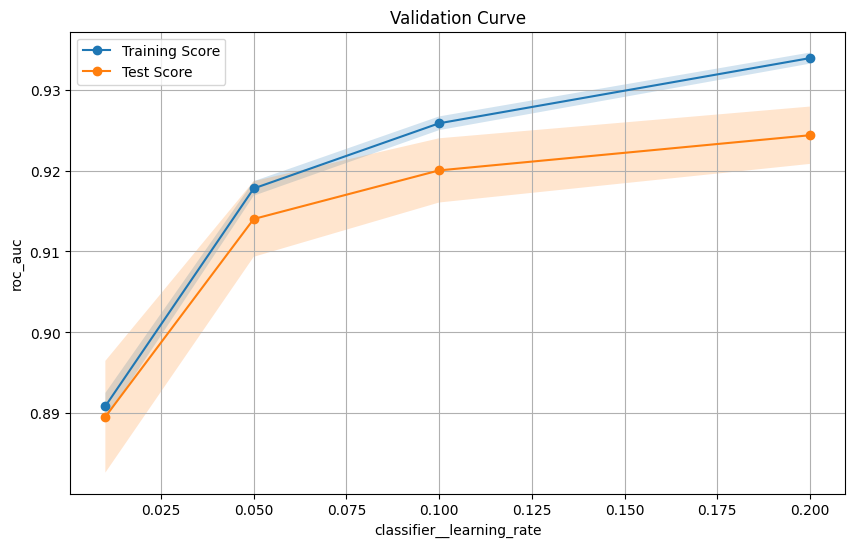

In [80]:
def plot_validation_curve(model, data, target, param_name, param_range, scoring, cv):
    train_scores, test_scores = validation_curve(model, data, target, param_name=param_name, param_range=param_range, cv=cv, scoring=scoring, n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_mean, label="Training Score", marker='o')
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.plot(param_range, test_mean, label="Test Score", marker='o')
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)
    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel(scoring)
    plt.legend()
    plt.grid()
    plt.show()

plot_validation_curve(GB_pipeline, train_data, target, "classifier__learning_rate", param_grid['classifier__learning_rate'], 'roc_auc', 5)

As we can see, the performance improves when the learning rate is higher. However, from 0.1 to 0.2, training scores continue to grow while the test scores start to slow down. This means that learning rates higher than 0.2 would lead to overfitting.

## Testing

And finally, we can test our best selected model with our test set to make predictions and evaluate the final score.

In [81]:
# Separate target from data, as did previously with the train set
test_data = test_set.drop(target_name, axis=1)
test_target = test_set[target_name].copy()

# Selecting the best model
final_model = grid_search.best_estimator_

test_predictions = final_model.predict(test_data)
test_probabilities = final_model.predict_proba(test_data)[:, 1]  

print("Final Model Metrics - Test Set:")
print(" - Accuracy:", accuracy_score(test_target, test_predictions))
print(" - F1-Score:", f1_score(test_target, test_predictions, pos_label=">50K"))
print(" - ROC-AUC:", roc_auc_score(test_target, test_probabilities))

Final Model Metrics - Test Set:
 - Accuracy: 0.8747121142330723
 - F1-Score: 0.7203564084989719
 - ROC-AUC: 0.9306833071954769
